In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import matplotlib.colors as mc
import colorsys
from random import randint
import re

In [29]:
df = pd.read_csv("/Users/sreenandk/Desktop/VISU/visu1.csv")

In [30]:
df.head()

,year,group,EXTRACT,freq
0,2008,cassandra,cassandra,38
1,2008,couchdb,couchdb,13
2,2008,hadoop,hadoop,123
3,2008,hbase,hbase,20
4,2008,hive,hive,28


In [31]:
current_year = 2019
dff = df[df['year'].eq(current_year)].sort_values(by='freq', ascending=True).head(20)
dff

,year,group,EXTRACT,freq
141,2019,rapidminer,rapidminer,27
135,2019,hbase,hbase,393
133,2019,couchdb,couchdb,433
136,2019,hive,hive,741
143,2019,storm,storm,753
132,2019,cassandra,cassandra,945
139,2019,neo4j,neo4j,1043
137,2019,kafka,kafka,1103
140,2019,pig,pig,1869
134,2019,hadoop,hadoop,2256


<BarContainer object of 12 artists>

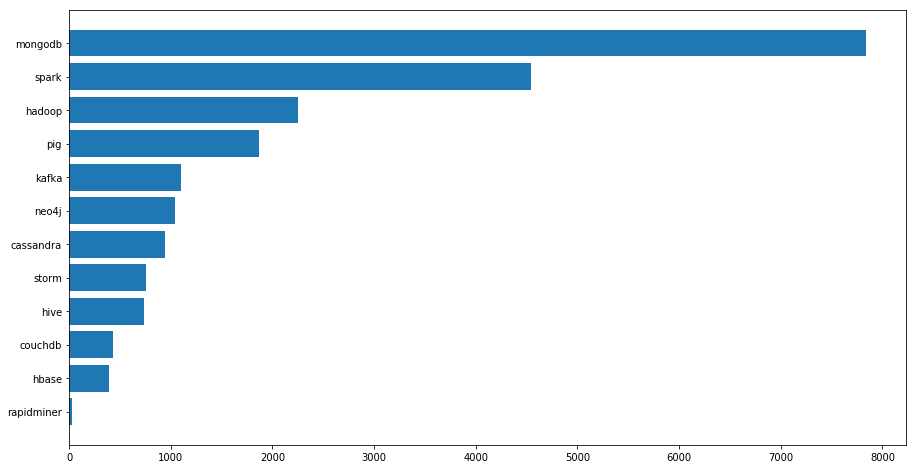

In [32]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['EXTRACT'], dff['freq'])

In [34]:
colors = dict(zip(
    ['rapidminer', 'hbase', 'couchdb', 'hive', 'storm', 'cassandra', 'neo4j', 'kafka', 'pig', 'hadoop', 'spark', 'mongodb'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50','#0a4f74', '#33aef0', '#4c5cbc', '#4cbc7c', '#bcd924']
))
group_lk = df.set_index('EXTRACT')['group'].to_dict()

Text(1,0.4,'2019')

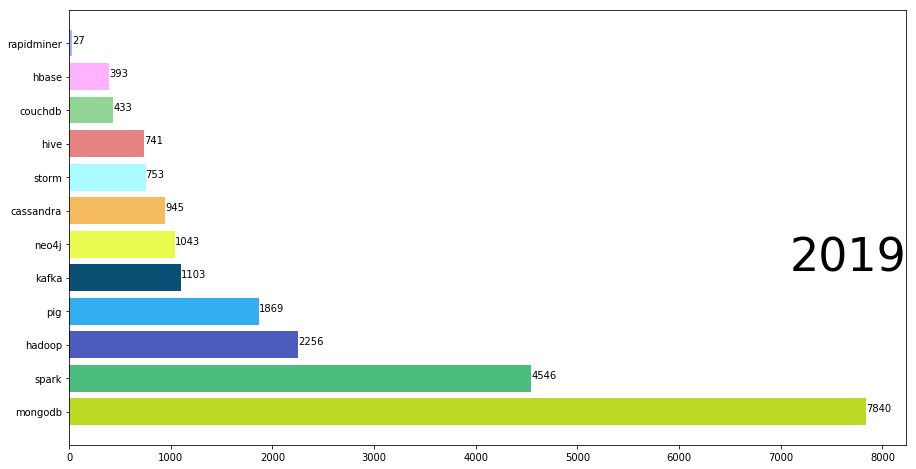

In [37]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip freqs from top to bottom
# pass colors freqs to `color=`
ax.barh(dff['EXTRACT'], dff['freq'], color=[colors[group_lk[x]] for x in dff['EXTRACT']])
# iterate over the freqs to plot labels and freqs (Tokyo, Asia, 38194.2)
for i, (freq, EXTRACT) in enumerate(zip(dff['freq'], dff['EXTRACT'])):
    #ax.text(freq, i,     EXTRACT,            ha='right')  # Tokyo: EXTRACT
    #ax.text(freq, i-.25, group_lk[EXTRACT],  ha='right')  # Asia: group EXTRACT
    ax.text(freq, i,     freq,           ha='left')   # 38194.2: freq
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

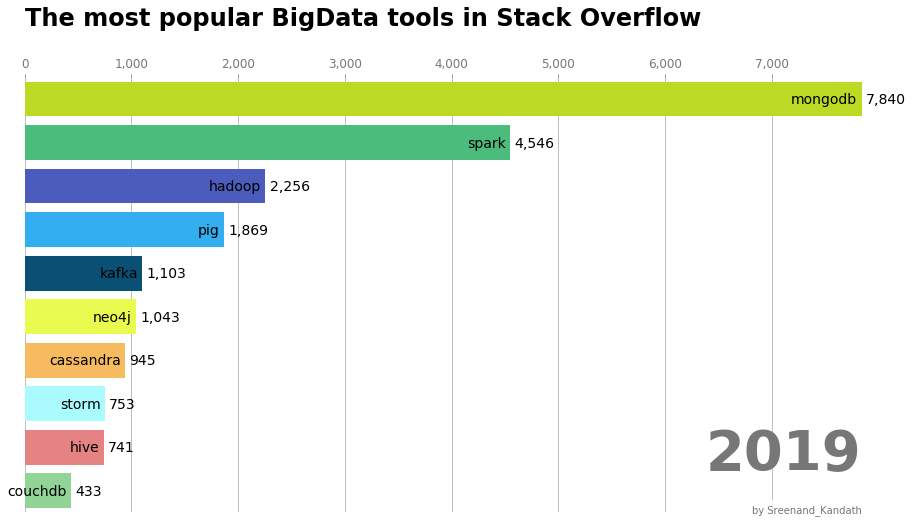

In [73]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='freq', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['EXTRACT'], dff['freq'], color=[colors[group_lk[x]] for x in dff['EXTRACT']])
    dx = dff['freq'].max() / 200
    for i, (freq, EXTRACT) in enumerate(zip(dff['freq'], dff['EXTRACT'])):
        ax.text(freq-dx, i,     EXTRACT,           size=14, weight=500, ha='right', va='center')
        #ax.text(freq-dx, i-.25, group_lk[EXTRACT], size=10, color='#444444', ha='right', va='baseline')
        ax.text(freq+dx, i,     f'{freq:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.1, year, transform=ax.transAxes, color='#777777', size=56, ha='right', weight=1000)
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most popular BigData tools in Stack Overflow ',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by Sreenand_Kandath', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2019)

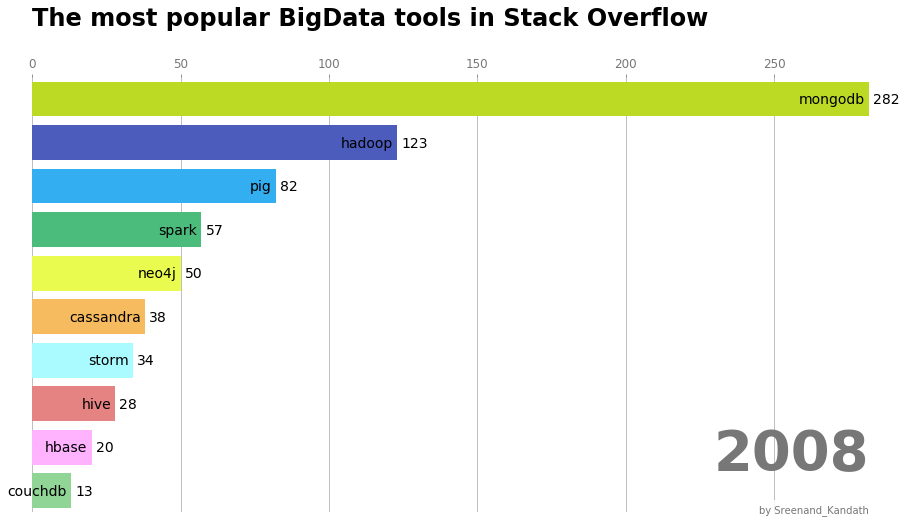

In [74]:
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2008, 2020))
HTML(animator.to_jshtml()) 

MovieWriter ffmpeg unavailable.


<IPython.core.display.HTML object>

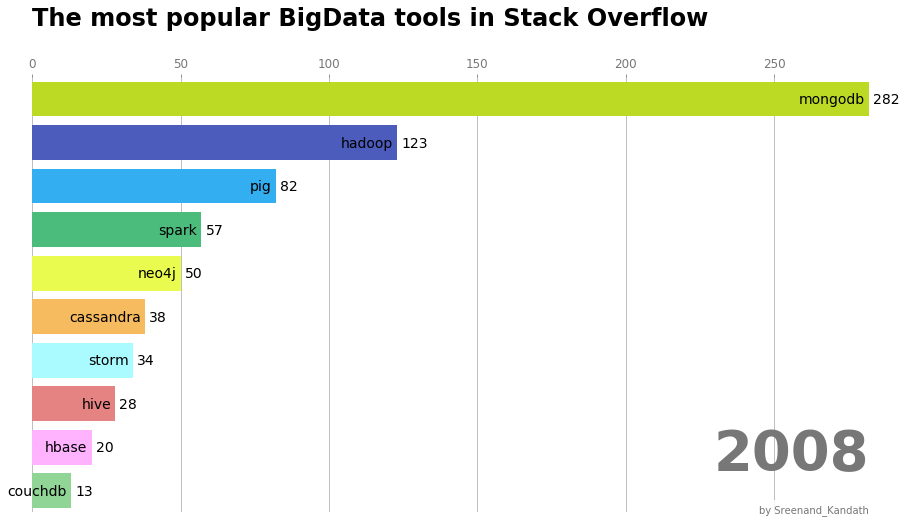

In [75]:
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2008, 2019))
HTML(animator.save("/Users/sreenandk/Desktop/VISU/video.gif"))